# Week 5: Class Project
This notebook uses concepts taught in previous weeks that include - reading datasets, pre-processing, cleaning and data visualiztion. The data set has been acquired from Kaggle (https://www.kaggle.com/mirichoi0218/insurance/data#). It consists of the following information:
- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

The goal of this notebook is to identify correations between these variables and visualize them.

Source: https://www.kaggle.com/mirichoi0218/insurance/data#

### Breif understanding of Health insurance charges

Like all insurance policies, health insurance is a contract or agreement between you and the insurance company you select. You buy a plan (you can choose from many different types), and the company agrees to pay all or part of your medical costs when you get sick or hurt. As you can imagine, the better or more expensive the plan, the less you will pay when you get sick. Each of the new plans covers all of the Essential Health Benefits and once you reach the annual out of pocket maximum all medical and prescription expenses are covered 100% for the rest of the year. The maximum out of pocket is key indicator you should look at when comparing policies.

In general there are 5 factors that affect the cost of your health insurance plan:
- Your age
- Your location
- Who is covered in the plan
- If you smoke or use tobacco
- The type of plan you choose

Source: http://thebenefitbrokers.com/Health_Insurance_101/, https://www.moneycrashers.com/factors-health-insurance-premium-costs/


---

## Part 1: Understanding the Dataset

Below is the description of the dataset from the Kaggle repository.

|Name	|	Data Type|Description|
|	----	|	---------|-----------|
|	Age		|continuous|Age of the patient in years|
|	Sex		|nominal		|M, F|
|	BMI	|	continuous	|Body mass index of the patient|
|	Children	|continuous	|Number of dependents|
|	Smoker	|	nominal	|Yes/No smoker|
|	Region|	nominal	|The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.|
|	Charges	|	integer		|Medical cost billed by health insurance|

In [60]:
#Importing libraries
#Loading the csv file
import numpy as np
import csv

f = open("D:/Downloads/insurance/insurance.csv")
all_lines = csv.reader(f, delimiter = ',')
dataset=[]
header = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

first = True
for line in all_lines:  
    # The first line is the header
    if first:
        header = line
        first = False
    else:
        d = dict(zip(header, line))
        d['age'] = int(d['age'])
        d['bmi'] = float(d['bmi'])
        d['children'] = int(d['children'])
        d['charges'] = float(d['charges'])
        dataset.append(d)
    

In [61]:
#Checking first row of the dataset
dataset[0]

{'age': 19,
 'sex': 'female',
 'bmi': 27.9,
 'children': 0,
 'smoker': 'yes',
 'region': 'southwest',
 'charges': 16884.924}

In [62]:
#number of entries in dataset
len(dataset)

1338

---

## Part 2: Simple statistics

The goal of the following code is to perform some simple statistics to understand the dataset - such as finding the average - age and BMI of the patients and the max and min age and BMI. Comparing the BMI of patients above and below the average age.

In [63]:
#average age of patients in dataset
avg_age=[]
for i in range(len(dataset)):
    avg_age.append(dataset[i]['age'])
np.mean(np.array(avg_age))

39.20702541106129

In [64]:
#average bmi of patients
bmi=[]
for i in range(len(dataset)):
    bmi.append(dataset[i]['bmi'])
np.mean(np.array(bmi))

30.66339686098655

In [65]:
#max bmi
np.max(np.array(bmi))

53.13

In [66]:
#min bmi
np.min(np.array(bmi))

15.96

In [67]:
#max age
np.max(np.array(avg_age))

64

In [68]:
#min age
np.min(np.array(avg_age))

18

In [69]:
#compare bmi of patients above average age approx 39 years old
bmiSmall = np.mean(np.array([dataset[x]['bmi'] for x in range(len(dataset)) if dataset[x]['age']<=39]))
bmiLarge = np.mean(np.array([dataset[x]['bmi'] for x in range(len(dataset)) if dataset[x]['age']>39]))

print('Patients below the age of 39 have an average bmi of ',bmiSmall)
print('Patients above the age of 39 have an average bmi of ',bmiLarge)

#looks like most patients in this dataset are obese (i.e. bmi >30)

Patients below the age of 39 have an average bmi of  30.074940652818988
Patients above the age of 39 have an average bmi of  31.26071536144578


---

## Part 3: Data visualizations

In this section of the code the library matplotlib was used to visualize the dataset. Additionally, methods were used to identify the correlation between age and BMI, age and insurance charges/cost, identifying the charge spread between smokers and non-smokers and the average cost difference between male and female patients.

In [70]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy
from collections import defaultdict

#### Correlations
Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.

A positive correlation is a relationship between two variables in which both variables either increase or decease at the same time. An example would be height and weight. Taller people tend to be heavier.
A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other. An example would be height above sea level and temperature. As you climb the mountain (increase in height) it gets colder (decrease in temperature).
A zero correlation exists when there is no relationship between two variables. For example their is no relationship between the amount of tea drunk and level of intelligence.

Source: https://www.simplypsychology.org/correlation.html

In [71]:
np.corrcoef(bmi,avg_age) #bmi and age arent correlated with a value of 0.1

array([[1.        , 0.10927188],
       [0.10927188, 1.        ]])

In [72]:
#charges of patients in dataset
charges=[]
for i in range(len(dataset)):
    charges.append(dataset[i]['charges'])

#### Scatterplot displaying Age vs Insurance Charge

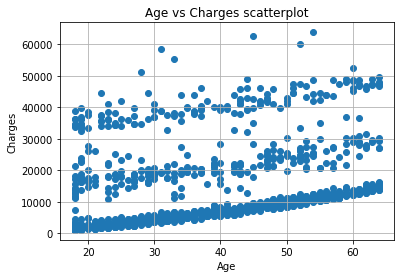

In [73]:
#Visualizing BMI vs Age
plt.gca().set(xlabel='Age', ylabel='Charges',
       title='Age vs Charges scatterplot')
plt.grid()
plt.scatter(avg_age, charges)

In [74]:
np.corrcoef(avg_age,charges) #positive correlation between age and charge... expected since insurance charge increases with age.

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

#### Box plot of Insurance Charge spread of Smoker vs Non-smoker 

([<matplotlib.axis.XTick at 0x18469b0>, <matplotlib.axis.XTick at 0x18465b0>],
 <a list of 2 Text xticklabel objects>)

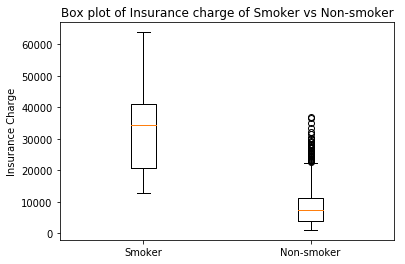

In [75]:
#smoker vs charge
S_charges = [dataset[x]['charges'] for x in range(len(dataset)) if dataset[x]['smoker']=='yes']
S_charges.sort()
NS_charges = [dataset[x]['charges'] for x in range(len(dataset)) if dataset[x]['smoker']=='no']
NS_charges.sort()

plt.ylabel('Insurance Charge')
plt.title('Box plot of Insurance charge of Smoker vs Non-smoker')

plt.boxplot([S_charges,NS_charges])
plt.xticks([1, 2], ['Smoker', 'Non-smoker'])

#### Bar chart of Average charge - Male vs Female

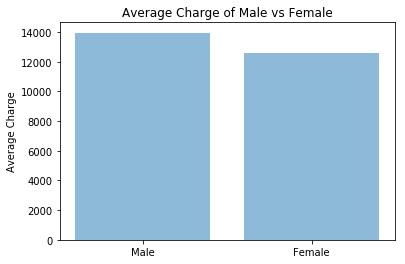

In [76]:
MCharge = sum([d['charges'] for d in dataset if d['sex'] == 'male'])/len([d for d in dataset if d['sex']=='male'])
FCharge = sum([d['charges'] for d in dataset if d['sex'] == 'female'])/len([d for d in dataset if d['sex']=='female'])
index = [1]
objects = ('Male', 'Female')
y_pos = np.arange(len(objects))
charge_data=[]
charge_data.append(MCharge)
charge_data.append(FCharge)

plt.bar(y_pos, bmi_data, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Charge')
plt.title('Average Charge of Male vs Female')

plt.show()

In [77]:
charge_data

[13956.751177721886, 12569.57884383534]